<a href="https://colab.research.google.com/github/sangmin213/face_recognition/blob/main/cats_and_dogs_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# kaggle package 설치
!pip install kaggle

In [ ]:
# kaggle api json파일 업로드
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"smhan220","key":"0e778591aa35385601f9adb94a47a724"}'}

In [ ]:
# kaggle.json파일 폴더 위치 변경 및 실행
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# 데이터 셋 불러오기
!kaggle competitions download -c dogs-vs-cats

 96% 521M/543M [00:02<00:00, 258MB/s]
100% 543M/543M [00:02<00:00, 251MB/s]
  0% 0.00/86.8k [00:00<?, ?B/s]
100% 86.8k/86.8k [00:00<00:00, 88.2MB/s]
 97% 263M/271M [00:01<00:00, 246MB/s]
100% 271M/271M [00:01<00:00, 242MB/s]


In [ ]:
# colab 원격 서버에 폴더 생성
!mkdir cats_and_dogs

In [ ]:
ls

cats_and_dogs/  sample_data/          test1.zip
kaggle.json     sampleSubmission.csv  train.zip


In [ ]:
# 경로 이동
%cd ./cats_and_dogs

/content/cats_and_dogs


In [ ]:
!pwd

/content/cats_and_dogs


In [ ]:
# 현재 위치에 파일 풀기
!unzip -qq "/content/test1.zip"
!unzip -qq "/content/train.zip"

In [ ]:
# # 코드 5-4 훈련, 검증, 테스트 폴더로 이미지 복사하기
import os, shutil

# # 원본 데이터셋을 압축 해제한 디렉터리 경로
original_dataset_dir = '/content/cats_and_dogs/train'

# # 소규모 데이터셋을 저장할 디렉터리
base_dir = '/content/cats_and_dogs_small'
if os.path.exists(base_dir):  # 차후 코드 재실행의 경우를 대비해 이미 디렉터리 있는 경우 삭제시키기
    shutil.rmtree(base_dir)   
os.mkdir(base_dir)

# # 훈련, 검증, 테스트 분할을 위한 디렉터리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# # 훈련용 고양이 사진 디렉터리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# # 훈련용 강아지 사진 디렉터리
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이 사진 디렉터리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 검증용 강아지 사진 디렉터리
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이 사진 디렉터리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 테스트용 강아지 사진 디렉터리
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 처음 1,000개의 고양이 이미지를 train_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 validation_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 고양이 이미지를 test_cats_dir에 복사합니다
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

# 처음 1,000개의 강아지 이미지를 train_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 validation_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 다음 500개 강아지 이미지를 test_dogs_dir에 복사합니다
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [ ]:
# 코드 5-5 강아지 vs. 고양이 분류를 위한 소규모 컨브넷 만들기
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [ ]:
# 코드 5-6 모델의 훈련 설정하기
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
# 코드 5-7 ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기
from keras.preprocessing.image import ImageDataGenerator

# 모든 이미지를 1/255로 스케일을 조정합니다 ( 이미지 데이터는 0~255(256개)의 값으로 표현되기 때문에 이를 0~1 값으로 조정함 )
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=20,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블이 필요합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# 코드 5-8 배치 제너레이터를 사용하여 모델 훈련하기
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
100/100 [==============================] - 20s 89ms/step - loss: 0.6896 - acc: 0.5510 - val_loss: 0.6983 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 9s 94ms/step - loss: 0.6576 - acc: 0.6050 - val_loss: 0.6380 - val_acc: 0.6350
Epoch 3/30
100/100 [==============================] - 10s 97ms/step - loss: 0.6189 - acc: 0.6700 - val_loss: 0.6344 - val_acc: 0.6210
Epoch 4/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5700 - acc: 0.7030 - val_loss: 0.5905 - val_acc: 0.6710
Epoch 5/30
100/100 [==============================] - 9s 85ms/step - loss: 0.5334 - acc: 0.7330 - val_loss: 0.5790 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 8s 85ms/step - loss: 0.5018 - acc: 0.7550 - val_loss: 0.5741 - val_acc: 0.6980
Epoch 7/30
100/100 [==============================] - 9s 86ms/step - loss: 0.4866 - acc: 0.7615 - val_loss: 0.5905 - val_acc: 0.6800
Epoch 8/30
100/100 [==============================] - 9s 86ms/step 

In [ ]:
# 코드 5-9 데이터 저장하기
model.save('cats_and_dogs_small_1.h5')

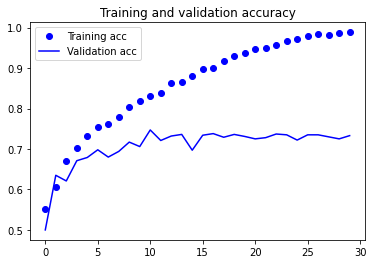

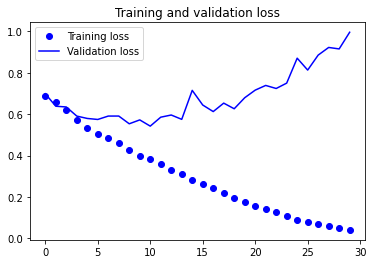

In [ ]:
# 코드 5-10 훈련의 정확도와 손실 그래프 그리기
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
'''
과적합 발생함.
drop out이나 normalization을 사용해도 되지만
데이터의 수가 train 2000개, valid and test 1000개 밖에 안 되므로
데이터 증식을 통해 과적합을 해결하고자 함.
'''

# 코드 5-11 ImageDataGenerator를 사용하여 데이터 증식 설정하기
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:52: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/100
60/60 [==============================] - 17s 275ms/step - loss: 0.6972 - acc: 0.5100 - val_loss: 0.6885 - val_acc: 0.5083
Epoch 2/100
60/60 [==============================] - 16s 265ms/step - loss: 0.6896 - acc: 0.5252 - val_loss: 0.6830 - val_acc: 0.5104
Epoch 3/100
60/60 [==============================] - 16s 265ms/step - loss: 0.6853 - acc: 0.5657 - val_loss: 0.6726 - val_acc: 0.5813
Epoch 4/100
60/60 [==============================] - 16s 265ms/step - loss: 0.6777 - acc: 0.5767 - val_loss: 0.6841 - val_acc: 0.5406
Epoch 5/100
60/60 [==============================] - 16s 265ms/step - loss: 0.6744 - acc: 0.5903 - val_loss: 0.6432 - val_acc: 0.6250
Epoch 6/100
60/60 [==============================] - 16s 264ms/step - loss: 0.6641 - acc: 0.5956 - val_loss: 0.6409 - val_acc: 0.6344
Epoch 7/100
60/60 [==============================] - 16s 265ms/step - loss: 0.6549 - acc: 0.6008 - val_loss: 0.6570 - val_acc: 0.6042
Epoch 8/100
60/60 [==============================] - 16s 262ms

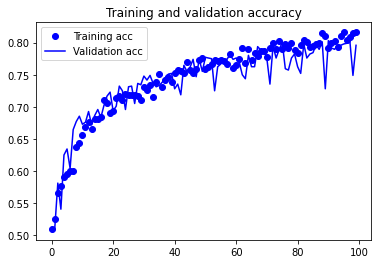

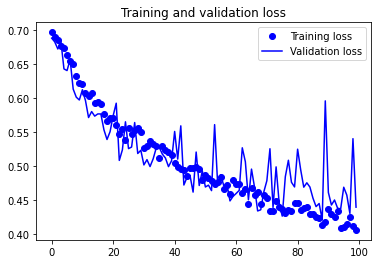

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# 검증 데이터는 증식되어서는 안 됩니다!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # 타깃 디렉터리
        train_dir,
        # 모든 이미지를 150 × 150 크기로 바꿉니다
        target_size=(150, 150),
        batch_size=32,
        # binary_crossentropy 손실을 사용하기 때문에 이진 레이블을 만들어야 합니다
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=60,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=30)

model.save('cats_and_dogs_small_2.h5')

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [1]:
%cd 

/content


In [18]:
!git init
!git config --global user.email "user_email@gmail.com"
!git config --global user.name "name"
!git add .
!git commit -m "sample code"
!git push origin master

Reinitialized existing Git repository in /content/.git/
fatal: remote origin already exists.
On branch master
nothing to commit, working tree clean
fatal: could not read Username for 'https://github.com': No such device or address


In [21]:
!git push --set-upstream origin master

fatal: could not read Username for 'https://github.com': No such device or address


In [24]:
!git remote rm face
!git remote rm origin

In [27]:
!git remote add origin https://github_private_token@github.com/github_user_name/repo_name.git

In [28]:
!git push origin master

Counting objects: 26, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (19/19), done.
Writing objects: 100% (26/26), 8.42 MiB | 901.00 KiB/s, done.
Total 26 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), done.
remote: 
remote: Create a pull request for 'master' on GitHub by visiting:
remote:      https://github.com/sangmin213/face_recognition/pull/new/master
remote: 
To https://github.com/sangmin213/face_recognition.git
 * [new branch]      master -> master
